# Learning Satyrn
learning how to use packages from Python to work on data analysis & mining

##### The Load-in

In [6]:
import datetime as dt
from datetime import datetime
import urllib
# Number manipulation
import numpy as np


# Structure manipulation
import pandas as pd
from pandas import Series, DataFrame
from pandas.tools.plotting import scatter_matrix


# Graphing 
import seaborn as sb

import matplotlib.pyplot as plt
from matplotlib import rcParams


# Stats
import scipy as sp
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency


# Machine Learning & Preprocessing Package
import sklearn
import sklearn.metrics as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

from collections import Counter

import networkx as nx



# Parameters for graphs
%matplotlib inline
rcParams['figure.figsize'] = 10,10
sb.set_style('whitegrid')


# Mac
#df = pd.read_csv('/Users/magicsoccer10/Dropbox/twerk werk/Property Value/07-17.csv')

# Arch
#df = pd.read_csv('C:/Users/scott/Dropbox/twerk werk/Property Value/07-17.csv')

# Work
df = pd.read_csv('C:/Users/sstandring/Dropbox/twerk werk/Property Value/07-17.csv')

In [10]:
df.head()

,Property Address,Property City,Property Zip Code,Sale Date,Sale_Price,PropertyType,Cap_Rate,Bldg SF,Floor Area Ratio,Building Class,...,Year Built,Number Of Units,Number Of Tenants,Longitude,Latitude,sale_date,sale_quarter,log_price,log_sqft,log_far
0,180 Montgomery St,San Francisco,94104,1/18/2007,128000000,Office,3.90,304162,17.473441,A,...,1979.0,NaN,50.0,-122.402065,37.790742,2007-01-18,1,18.667541,12.625316,2.860682
1,700 Lincoln Village Cir,Larkspur,94939,7/25/2007,94500000,Multi-Family,4.28,293198,0.397103,B,...,1978.0,342.0,NaN,-122.507256,37.947473,2007-07-25,3,18.364110,12.588603,-0.923559
2,2020 Kittredge St,Berkeley,94704,6/8/2007,75000000,Multi-Family,4.25,127830,1.982844,B,...,2006.0,NaN,NaN,-122.269531,37.867930,2007-06-08,2,18.132999,11.758457,0.684532
3,155 Grand Ave,Oakland,94612,5/11/2007,72000000,Office,5.60,204336,3.114445,A,...,1990.0,NaN,11.0,-122.263818,37.810666,2007-05-11,2,18.092177,12.227521,1.136051
4,22301 Foothill Blvd,Hayward,94541,9/20/2007,66500000,Office,6.61,336000,0.996061,B,...,1958.0,NaN,4.0,-122.084450,37.677927,2007-09-20,3,18.012713,12.724866,-0.003947


In [30]:
# df.duplicated(['Property Address'])
# df.drop_duplicates(['Property Address'])
# filled_df = df.fillna({6:4.5, 14:3})
# filled_df
# df.dropna(axis = 1)# or 2 (col or row))
# fillna(tell col: what value, again)
# drop_df = df.dropna(axis = 1)
# drop_df

df['sale_date'] = pd.to_datetime(df['Sale Date'])
df['sale_quarter'] = df['sale_date'].dt.quarter
df['sale_quarter'] = df['sale_quarter'].astype('int')
df['log_price'] = np.log(df.Sale_Price)

df['log_sqft'] = np.log(df['Bldg SF'])
df['log_far'] = np.log(df['Floor Area Ratio'])

#### Concatenate/Join
pd.concate([object1,object2], axis = 1) no axis means joining more rows not cols. object.drop([0,2], axis =1) no axis means dropping cols. 0 and 2.
DataFrame.join(object1, object2) object.append(object, ignore_index=True) ignore_index creats new indexes
object.sort_values(by[col.], ascending=[False])

In [11]:
df.groupby(df['PropertyType'])

#### Count Missing Values

In [12]:
df.isnull().sum()

Property Address         0
Property City            0
Property Zip Code        0
Sale Date                0
Sale_Price               0
PropertyType             0
Cap_Rate                 0
Bldg SF                  0
Floor Area Ratio         0
Building Class           0
Building Condition       0
BuildingMaterials        0
Year Built             138
Number Of Units       1926
Number Of Tenants     3681
Longitude                0
Latitude                 0
sale_date                0
sale_quarter             0
log_price                0
log_sqft                 0
log_far                  0
dtype: int64

#### Grouping 

In [13]:
grouped = df.groupby(df['PropertyType'])
grouped.median()

,Property Zip Code,Sale_Price,Cap_Rate,Bldg SF,Floor Area Ratio,Year Built,Number Of Units,Number Of Tenants,Longitude,Latitude,sale_quarter,log_price,log_sqft,log_far
PropertyType,,,,,,,,,,,,,,
Industrial,94551.0,3320100.0,6.200,24180.0,0.460002,1972.0,NaN,1.0,-122.155676,37.649460,3.0,15.015505,10.093281,-0.776525
Multi-Family,94541.0,1800000.0,5.100,7000.0,0.822673,1959.0,9.0,1.0,-122.256623,37.772640,3.0,14.403297,8.853665,-0.195197
Office,94404.0,7325000.0,5.805,24385.5,0.917725,1975.0,1.5,6.0,-122.269801,37.781950,3.0,15.806798,10.101736,-0.085890
Retail,94544.0,1767500.0,5.950,5379.5,0.602820,1958.0,3.0,2.0,-122.254294,37.760644,3.0,14.385068,8.590349,-0.506137
Specialty,94107.0,12750000.0,5.500,117961.0,6.534873,1990.0,NaN,2.0,-122.399071,37.783272,1.0,16.361042,11.678109,1.877153


# Graphing and Plotting

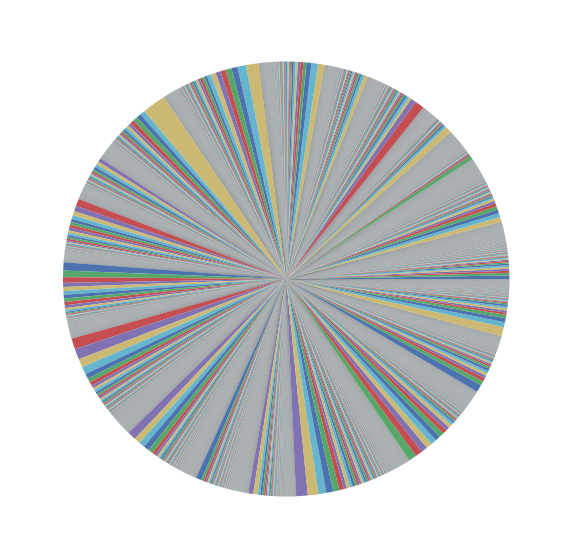

In [14]:
plt.pie(df['Sale_Price'])
plt.show()

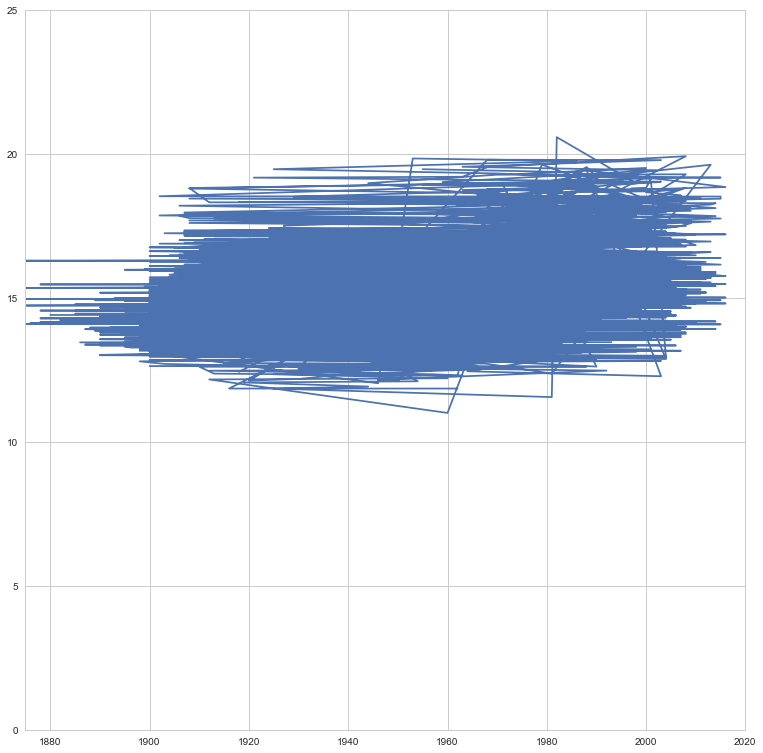

In [15]:
x = df['log_price']
y = df['Year Built']
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1,1])
ax.set_xlim([1875,2020])
ax.set_ylim([0,25])
ax.plot(df['Year Built'],df['log_price'])

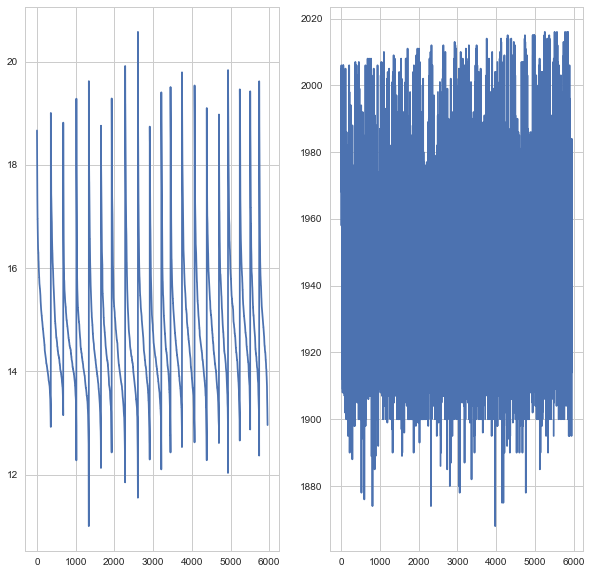

In [16]:
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(df['log_price'])
ax2.plot(df['Year Built'])

<Container object of 5957 artists>

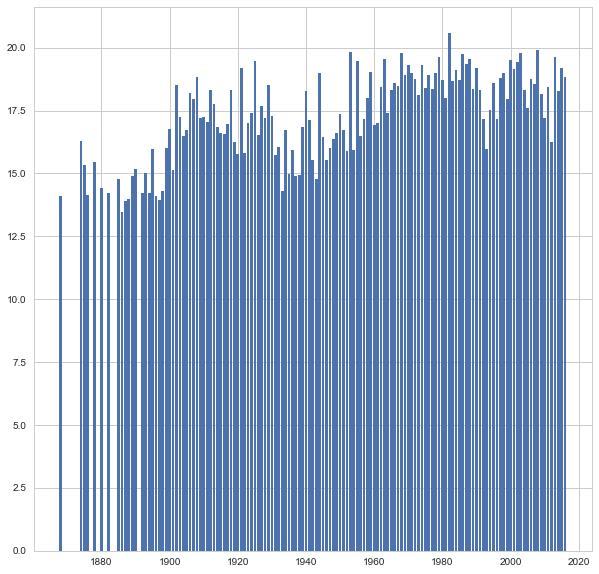

In [17]:
plt.bar(df['Year Built'], df['log_price'])

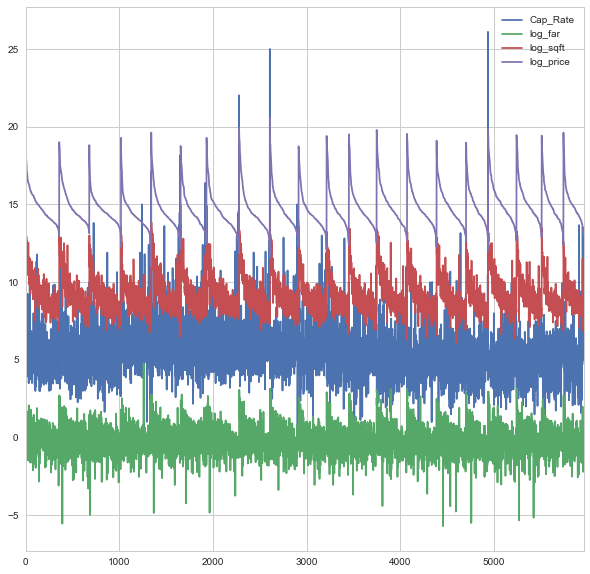

In [18]:
data = df[['Cap_Rate', 'log_far','log_sqft','log_price']]
data.plot()

In [19]:
#Making sale year by extracting last 4 characters from Sale Date 
def remover(s):
    return int(s[-4:])
df['sale_year'] = [remover(s) for s in df['Sale Date']]

Now:
- create price/sqft
- filter to multifamily only
- create the new dataframe
- groupby sale year and zip code
- use mean find average per zip and year
- use unstack:
    - http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html
    - Pivot a level of the (necessarily hierarchical) index labels, returning a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels. If the index is not a MultiIndex, the output will be a Series (the analogue of stack when the columns are not a MultiIndex). The level involved will automatically get sorted.

In [20]:
df['ppsf'] = df.Sale_Price / df['Bldg SF']
df['zip'] = df['Property Zip Code']
dx = df.loc[df['PropertyType'] == 'Multi-Family']
ts = dx[['sale_year','ppsf','zip']]
ts_year = (ts.groupby(['sale_year','zip'])
    .mean()['ppsf']
    .unstack())
# remove NaN
tsd = ts_year.dropna(axis = 1)

Plot Specs

In [32]:
df['sale_yr_qt'] = str(df['sale_year'])+str(df['sale_quarter'])

df.head()

,Property Address,Property City,Property Zip Code,Sale Date,Sale_Price,PropertyType,Cap_Rate,Bldg SF,Floor Area Ratio,Building Class,...,Latitude,sale_date,sale_quarter,log_price,log_sqft,log_far,sale_year,ppsf,zip,sale_yr_qt
0,180 Montgomery St,San Francisco,94104,1/18/2007,128000000,Office,3.90,304162,17.473441,A,...,37.790742,2007-01-18,1,18.667541,12.625316,2.860682,2007,420.828374,94104,0 2007\n1 2007\n2 2007\n3 ...
1,700 Lincoln Village Cir,Larkspur,94939,7/25/2007,94500000,Multi-Family,4.28,293198,0.397103,B,...,37.947473,2007-07-25,3,18.364110,12.588603,-0.923559,2007,322.307792,94939,0 2007\n1 2007\n2 2007\n3 ...
2,2020 Kittredge St,Berkeley,94704,6/8/2007,75000000,Multi-Family,4.25,127830,1.982844,B,...,37.867930,2007-06-08,2,18.132999,11.758457,0.684532,2007,586.716733,94704,0 2007\n1 2007\n2 2007\n3 ...
3,155 Grand Ave,Oakland,94612,5/11/2007,72000000,Office,5.60,204336,3.114445,A,...,37.810666,2007-05-11,2,18.092177,12.227521,1.136051,2007,352.360817,94612,0 2007\n1 2007\n2 2007\n3 ...
4,22301 Foothill Blvd,Hayward,94541,9/20/2007,66500000,Office,6.61,336000,0.996061,B,...,37.677927,2007-09-20,3,18.012713,12.724866,-0.003947,2007,197.916667,94541,0 2007\n1 2007\n2 2007\n3 ...


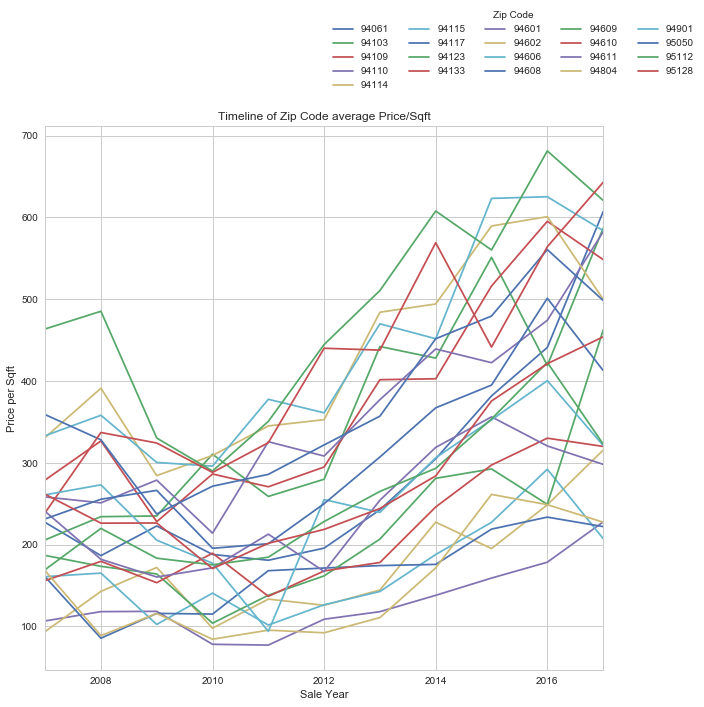

In [21]:
tsd.plot()
plt.xlabel('Sale Year')
plt.ylabel('Price per Sqft')
plt.title('Timeline of Zip Code average Price/Sqft')
plt.legend(title = 'Zip Code',loc='lower left', bbox_to_anchor=(0.5, 1.05), ncol=5, fancybox=True, shadow=True)

group by zip, take the average of each zip's ppsf and create a list 

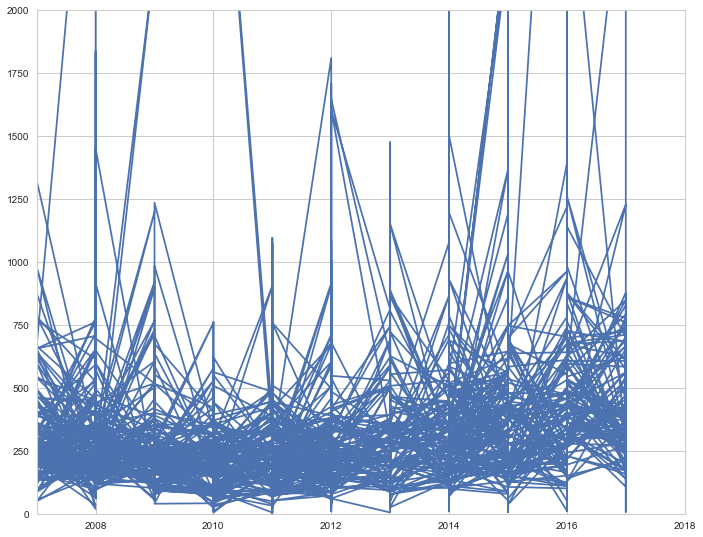

In [14]:
x = ts_zip.sale_year
y = ts_zip.ppsf
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1,1])
ax.set_xlim([2007,2018])
ax.set_ylim([0,2000])
ax.plot(ts.sale_year,ts.ppsf)


##### Histograms

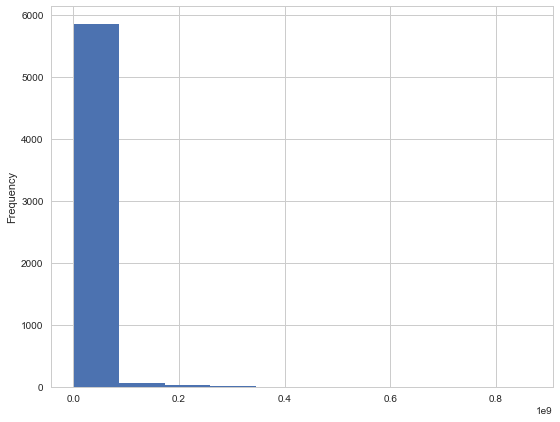

In [15]:
df['Sale_Price'].plot(kind = 'hist')

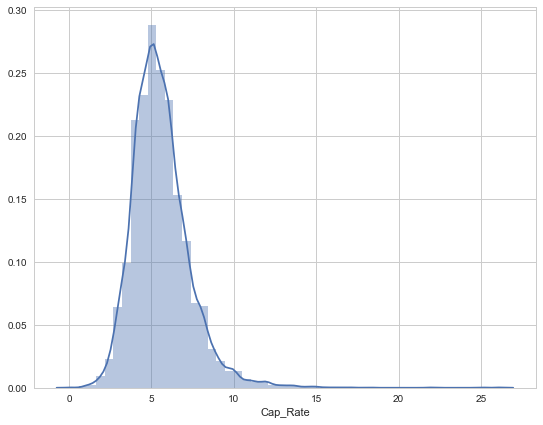

In [16]:
sb.distplot(df['Cap_Rate'])

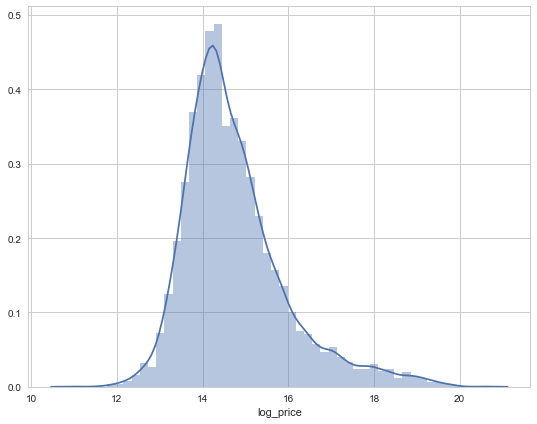

In [17]:
sb.distplot(df.log_price)

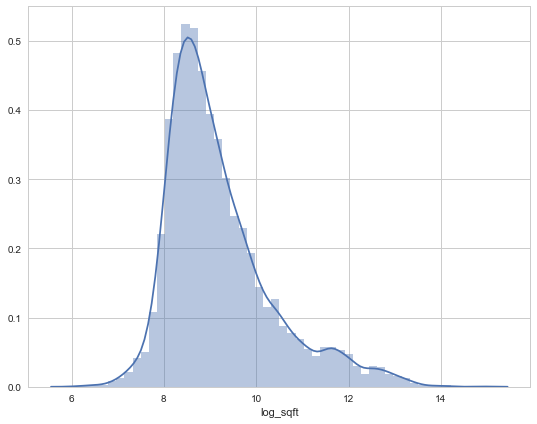

In [18]:
sb.distplot(df.log_sqft)

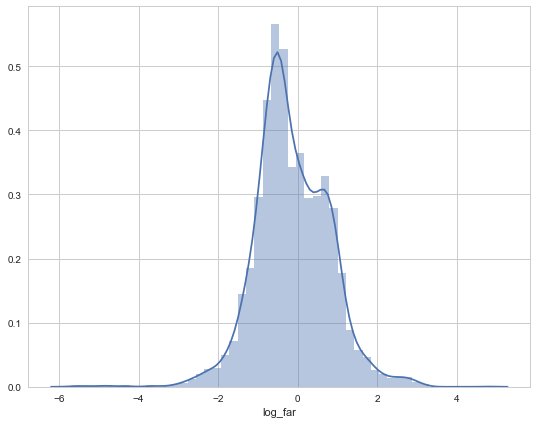

In [19]:
sb.distplot(df.log_far)

##### Scatterplots

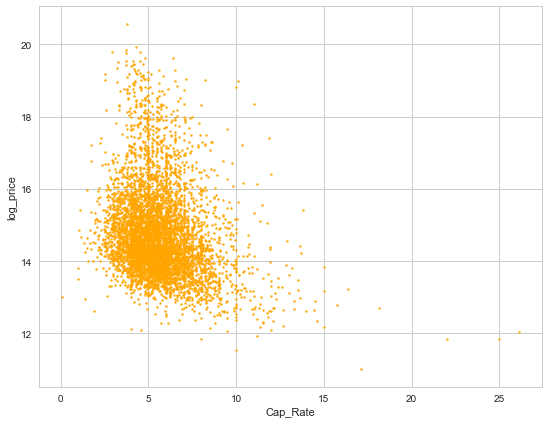

In [20]:
df.plot(kind = 'scatter', x = 'Cap_Rate', y = 'log_price', c = ['orange'], s = 4)

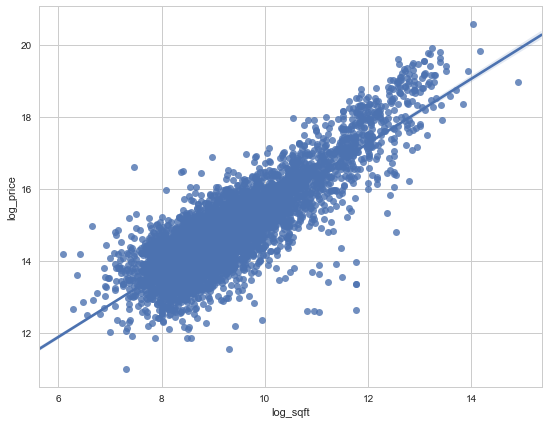

In [21]:
sb.regplot('log_sqft','log_price',df, scatter=True)

### Matrices!!!!

In [22]:
df.head()

,Property Address,Property City,Property Zip Code,Sale Date,Sale_Price,PropertyType,Cap_Rate,Bldg SF,Floor Area Ratio,Building Class,...,Number Of Tenants,Longitude,Latitude,sale_date,log_price,log_sqft,log_far,sale_year,ppsf,zip
0,180 Montgomery St,San Francisco,94104,1/18/2007,128000000,Office,3.90,304162,17.473441,A,...,50.0,-122.402065,37.790742,2007-01-18,18.667541,12.625316,2.860682,2007,420.828374,94104
1,700 Lincoln Village Cir,Larkspur,94939,7/25/2007,94500000,Multi-Family,4.28,293198,0.397103,B,...,NaN,-122.507256,37.947473,2007-07-25,18.364110,12.588603,-0.923559,2007,322.307792,94939
2,2020 Kittredge St,Berkeley,94704,6/8/2007,75000000,Multi-Family,4.25,127830,1.982844,B,...,NaN,-122.269531,37.867930,2007-06-08,18.132999,11.758457,0.684532,2007,586.716733,94704
3,155 Grand Ave,Oakland,94612,5/11/2007,72000000,Office,5.60,204336,3.114445,A,...,11.0,-122.263818,37.810666,2007-05-11,18.092177,12.227521,1.136051,2007,352.360817,94612
4,22301 Foothill Blvd,Hayward,94541,9/20/2007,66500000,Office,6.61,336000,0.996061,B,...,4.0,-122.084450,37.677927,2007-09-20,18.012713,12.724866,-0.003947,2007,197.916667,94541


C:\Users\Scott\Anaconda3\lib\site-packages\numpy\lib\function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\Scott\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


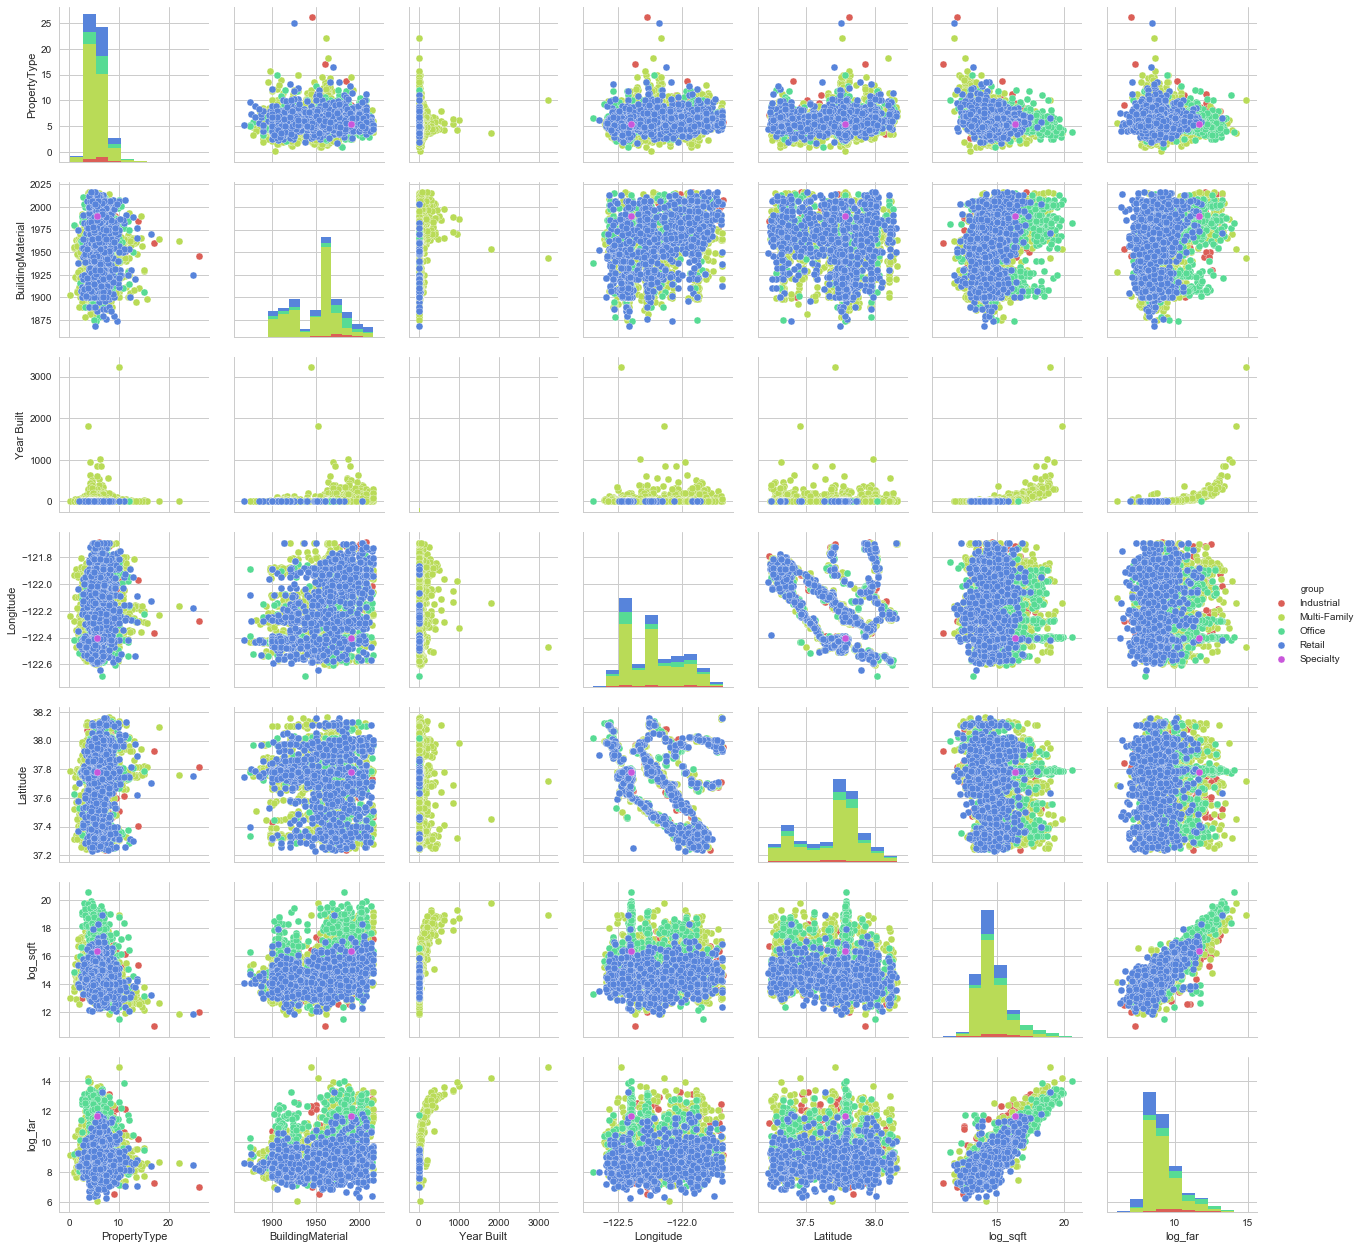

In [23]:
pv_df = pd.DataFrame((df.ix[:,(3,6,9,10,11,12,13,15,16,17,18,19)].values), columns = ['Property Zip Code','PropertyType','Cap_Rate','Building Class','Building Condition','BuildingMaterial','Year Built','Longitude','Latitude','log_price','log_sqft','log_far'])
pv_target = df.ix[:,5].values

pv_df['group'] = pd.Series(pv_target,dtype='category')
sb.pairplot(pv_df, hue = 'group', palette = 'hls')

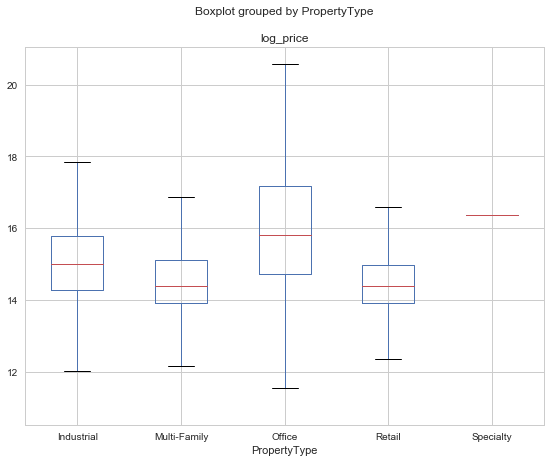

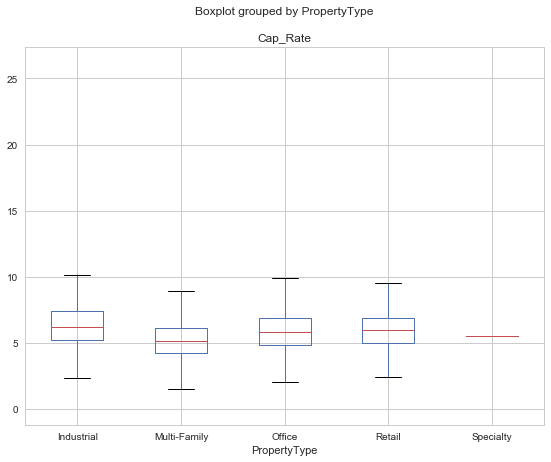

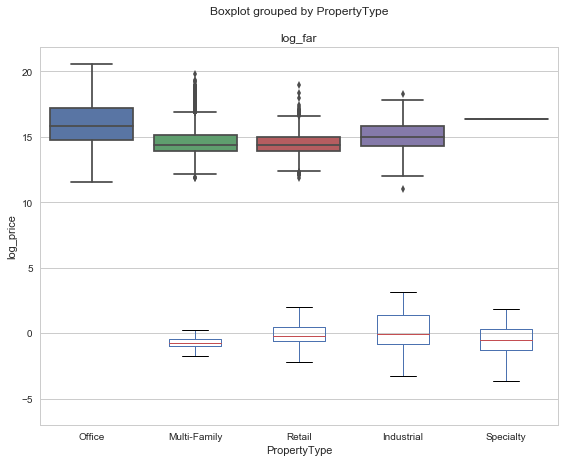

In [24]:
df.boxplot(column = 'log_price', by = 'PropertyType')
df.boxplot(column = 'Cap_Rate', by = 'PropertyType')
df.boxplot(column = 'log_far', by = 'PropertyType')

sb.boxplot(x='PropertyType',y='log_price',data=df)

#### Coloring

<Container object of 5957 artists>

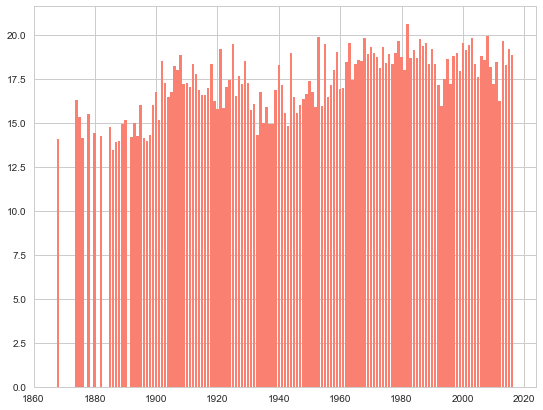

In [25]:
color =  ['salmon']
plt.bar(df['Year Built'], df['log_price'], color = color)

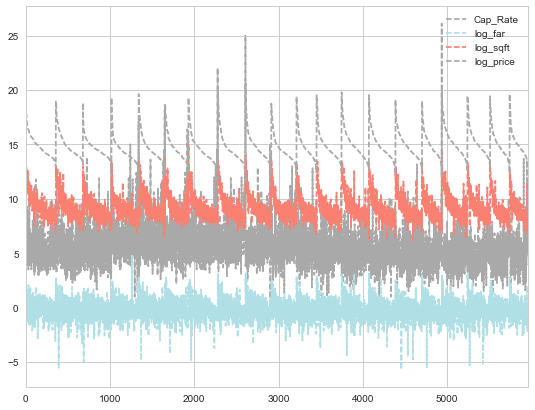

In [26]:
color_theme = ['darkgray','powderblue','salmon']
data.plot(color = color_theme, ls="--")

#### Labels

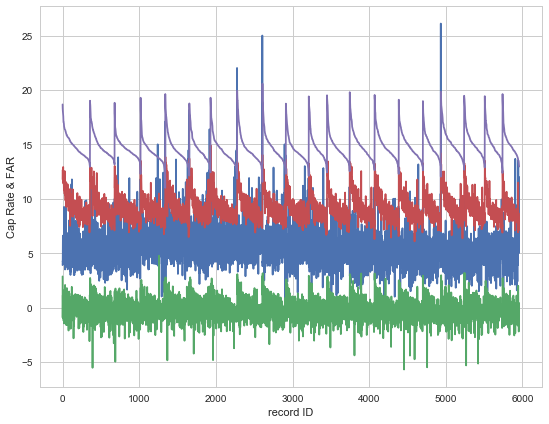

In [27]:
plt.plot(data, marker = '+')
ax.set_ylim([0,20])
plt.xlabel('record ID')
plt.ylabel('Cap Rate & FAR')

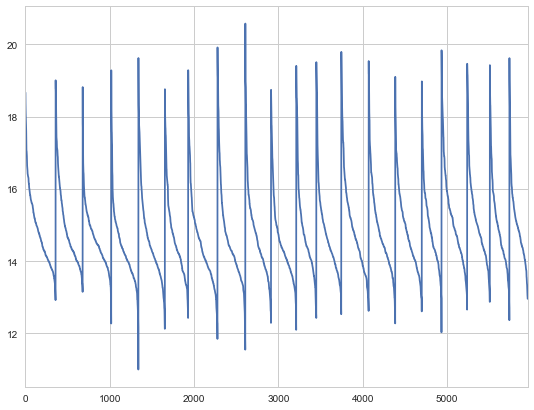

In [100]:
df['log_price'].plot()
ax.set_xticks(range(32))
ax.set_xticklabels(df.PropertyType, rotation=60, fontsize = 'small')
ax.set_title('Building SquareFootage by Property Type')

ax.set_xlabel('Building Type')
ax.set_ylabel('Square-footage')

## NumPy Math & Stats

In [29]:
lon = df['Longitude']
lat = df['Latitude']

#df.idxmax() <- Shows which row the max is in
df.mean()
df.max()
df.min()
df.std()
df.var()
df.describe()

,Property Zip Code,Sale_Price,Cap_Rate,Bldg SF,Floor Area Ratio,Year Built,Number Of Units,Number Of Tenants,Longitude,Latitude,log_price,log_sqft,log_far,sale_year,ppsf,zip
count,5957.000000,5.957000e+03,5957.000000,5.957000e+03,5957.000000,5819.000000,4031.000000,2276.000000,5957.000000,5957.000000,5957.000000,5957.000000,5957.000000,5957.000000,5957.000000,5957.000000
mean,94475.470371,8.268869e+06,5.573653,2.703480e+04,1.398696,1951.581371,23.393699,4.529877,-122.227742,37.696825,14.751625,9.195045,-0.142806,2012.348162,314.808802,94475.470371
std,360.264366,2.930807e+07,1.774339,8.161091e+04,2.455068,28.637023,78.949967,8.404054,0.205512,0.211982,1.204496,1.148940,0.935232,2.885256,253.747244,360.264366
min,94002.000000,6.000000e+04,0.090000,4.390000e+02,0.003369,1868.000000,0.000000,1.000000,-122.688784,37.228046,11.002100,6.084499,-5.693069,2007.000000,2.364341,94002.000000
25%,94111.000000,1.160000e+06,4.420000,4.466000e+03,0.483397,1925.000000,6.000000,1.000000,-122.415374,37.531500,13.963931,8.404248,-0.726917,2010.000000,179.380665,94111.000000
50%,94541.000000,1.980000e+06,5.360000,7.392000e+03,0.771033,1960.000000,8.000000,2.000000,-122.256721,37.771454,14.498607,8.908154,-0.260025,2013.000000,263.365167,94541.000000
75%,94621.000000,4.268000e+06,6.450000,1.601400e+04,1.650205,1969.000000,16.000000,4.000000,-122.066974,37.807410,15.266656,9.681219,0.500900,2015.000000,388.965517,94621.000000
max,95148.000000,8.645000e+08,26.100000,3.000000e+06,117.158430,2016.000000,3221.000000,97.000000,-121.687980,38.162559,20.577662,14.914123,4.763527,2017.000000,9323.479250,95148.000000


In [30]:
cities = df['Property City']
cities.value_counts() #shows unique values and how many

San Francisco          1546
Oakland                 823
San Jose                576
Berkeley                213
Redwood City            178
Hayward                 159
Santa Clara             143
San Mateo               131
San Rafael              122
Sunnyvale               110
Mountain View           100
Concord                  99
San Leandro              98
Alameda                  79
Richmond                 77
Vallejo                  74
Antioch                  72
Burlingame               71
Walnut Creek             67
Fremont                  66
Menlo Park               59
Palo Alto                57
Campbell                 52
South San Francisco      49
Novato                   44
San Carlos               42
Daly City                42
Belmont                  41
Livermore                40
Castro Valley            39
                       ... 
Larkspur                  8
Rodeo                     7
Oakley                    7
San Lorenzo               6
Foster City         

In [31]:
df.head(1)

,Property Address,Property City,Property Zip Code,Sale Date,Sale_Price,PropertyType,Cap_Rate,Bldg SF,Floor Area Ratio,Building Class,...,Number Of Tenants,Longitude,Latitude,sale_date,log_price,log_sqft,log_far,sale_year,ppsf,zip
0,180 Montgomery St,San Francisco,94104,1/18/2007,128000000,Office,3.9,304162,17.473441,A,...,50.0,-122.402065,37.790742,2007-01-18,18.667541,12.625316,2.860682,2007,420.828374,94104


In [32]:
num = LabelEncoder()
df['bin_city'] = num.fit_transform(df['Property City'].astype('str'))
df['bin_zip'] = num.fit_transform(df['Property Zip Code'].astype('str'))
df['bin_type'] = num.fit_transform(df['PropertyType'].astype('str'))
df['bin_class'] = num.fit_transform(df['Building Class'].astype('str'))
df['bin_condition'] = num.fit_transform(df['Building Condition'].astype('str'))
df['bin_material'] = num.fit_transform(df['BuildingMaterials'].astype('str'))
df['bin_yrbuilt'] = num.fit_transform(df['Year Built'].astype('str'))
qual = df[['bin_city','bin_type','bin_class','bin_condition','bin_material']]
qual.head()

,bin_city,bin_type,bin_class,bin_condition,bin_material
0,74,2,0,3,3
1,39,1,1,3,5
2,10,1,1,3,4
3,53,2,0,3,0
4,35,2,1,3,2


In [33]:
grouper = qual.groupby(df['PropertyType'])
grouper.describe()

bin_city  bin_type    bin_class  bin_condition  \
PropertyType                                                            
Industrial   count   181.000000     181.0   181.000000     181.000000   
             mean     55.756906       0.0     1.651934       2.812155   
             std      24.951876       0.0     0.511381       0.585061   
             min       0.000000       0.0     0.000000       1.000000   
             25%      35.000000       0.0     1.000000       3.000000   
             50%      56.000000       0.0     2.000000       3.000000   
             75%      76.000000       0.0     2.000000       3.000000   
             max      90.000000       0.0     2.000000       3.000000   
Multi-Family count  4101.000000    4101.0  4101.000000    4101.000000   
             mean     58.800293       1.0     1.835894       2.943672   
             std      23.478872       0.0     0.401994       0.343578   
             min       0.000000       1.0     0.000000       0.000000   
             25%      53.000000       1.0     2.000000       3.000000   
             50%      74.000000       1.0     2.000000       3.000000   
             75%      74.000000       1.0     2.000000       3.000000   
             max      91.000000       1.0     4.000000       4.000000   
Office       count   672.000000     672.0   672.000000     672.000000   
             mean     60.532738       2.0     1.196429       2.803571   
             std      22.244585       0.0     0.675383       0.666498   
             min       0.000000       2.0     0.000000       0.000000   
             25%      50.000000       2.0     1.000000       3.000000   
             50%      74.000000       2.0     1.000000       3.000000   
             75%      74.000000       2.0     2.000000       3.000000   
             max      91.000000       2.0     2.000000       4.000000   
Retail       count  1002.000000    1002.0  1002.000000    1002.000000   
             mean     56.770459       3.0     3.998004       2.916168   
             std      25.116695       0.0     0.063182       0.415675   
             min       0.000000       3.0     2.000000       0.000000   
             25%      36.500000       3.0     4.000000       3.000000   
             50%      72.000000       3.0     4.000000       3.000000   
             75%      75.000000       3.0     4.000000       3.000000   
             max      91.000000       3.0     4.000000       4.000000   
Specialty    count     1.000000       1.0     1.000000       1.000000   
             mean     74.000000       4.0     4.000000       3.000000   
             std            NaN       NaN          NaN            NaN   
             min      74.000000       4.0     4.000000       3.000000   
             25%      74.000000       4.0     4.000000       3.000000   
             50%      74.000000       4.0     4.000000       3.000000   
             75%      74.000000       4.0     4.000000       3.000000   
             max      74.000000       4.0     4.000000       3.000000   

                    bin_material  
PropertyType                      
Industrial   count    181.000000  
             mean       1.359116  
             std        1.584048  
             min        0.000000  
             25%        0.000000  
             50%        1.000000  
             75%        2.000000  
             max        5.000000  
Multi-Family count   4101.000000  
             mean       3.697635  
             std        1.782097  
             min        0.000000  
             25%        4.000000  
             50%        4.000000  
             75%        5.000000  
             max        5.000000  
Office       count    672.000000  
             mean       2.526786  
             std        1.859249  
             min        0.000000  
             25%        0.000000  
             50%        3.000000  
             75%        4.000000  
             max        5.000000  
Retail       count   1002.000000  
           

In [34]:
df['yr_built_cat'] = pd.Series(df['Year Built'],dtype = 'category')
df['yr_built_cat'].value_counts()

1963.0    263
1964.0    251
1962.0    225
1960.0    217
1961.0    184
1965.0    172
1900.0    157
1959.0    139
1958.0    132
1907.0    119
1908.0     93
1957.0     92
1970.0     92
1925.0     91
1910.0     90
1950.0     81
1972.0     80
1966.0     77
1924.0     72
1969.0     72
1923.0     70
1986.0     70
1926.0     69
1955.0     69
1927.0     67
1968.0     67
1956.0     64
1912.0     62
1967.0     60
1971.0     59
         ... 
1996.0      8
1994.0      8
2011.0      8
2010.0      7
2012.0      7
1903.0      7
1933.0      7
1901.0      7
2016.0      6
1931.0      6
1899.0      5
1995.0      5
1934.0      4
1878.0      4
1889.0      3
1885.0      3
1896.0      2
1894.0      2
1893.0      2
1892.0      2
1897.0      2
1887.0      2
1874.0      2
1875.0      2
1880.0      2
1876.0      1
1888.0      1
1882.0      1
1886.0      1
1868.0      1
Name: yr_built_cat, dtype: int64

#### Crosstabbing
Crosstabs are a good way to view categorical variables against each other
This may be a good thing to use for early data examination or understanding a variable more in-depth

In [35]:
pd.crosstab(df.bin_type,df.bin_class)

bin_class,0,1,2,3,4
bin_type,,,,,
0,3,57,121,0,0
1,40,600,3457,1,3
2,100,340,232,0,0
3,0,0,1,0,1001
4,0,0,0,0,1


# Correlation Analysis

#### Linear Correlation (Pearson)

Assumptions
- normally distributed
- numeric variables
- linearly related

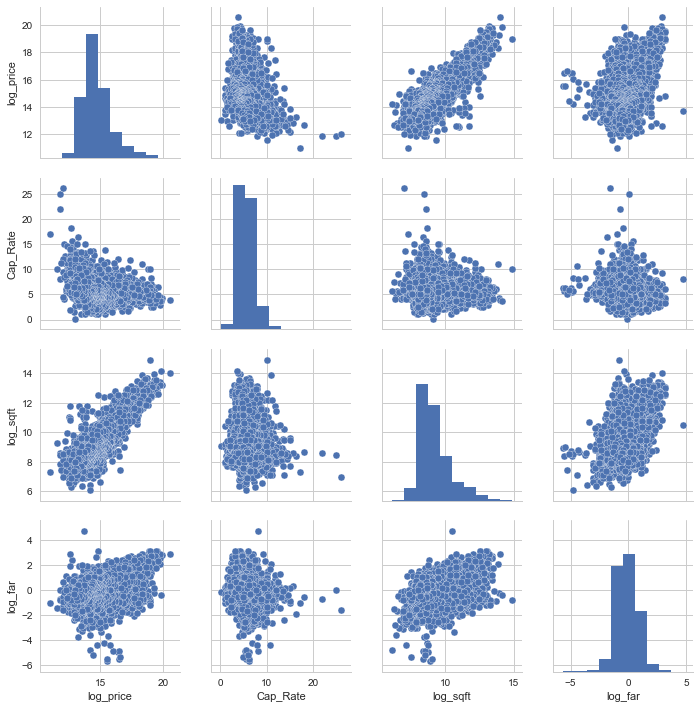

In [36]:
quant = df[['log_price','Cap_Rate','log_sqft','log_far']]
sb.pairplot(quant)

In [37]:
price = df['Sale_Price']
cap = df['Cap_Rate']
sqft = df['Bldg SF']
far = df['Floor Area Ratio']

pearsonr_coefficient, p_value = pearsonr(price, cap)
print ('Pearson R Corr. Coef.')
(pearsonr_coefficient)

Pearson R Corr. Coef.


-0.080963545039635793

In [38]:
pearsonr_coefficient, p_value = pearsonr(price, sqft)
print ('Pearson R Corr. Coef.')
(pearsonr_coefficient)

Pearson R Corr. Coef.


0.77203874719578058

In [39]:
pearsonr_coefficient, p_value = pearsonr(price, far)
print ('Pearson R Corr. Coef.')
(pearsonr_coefficient)

Pearson R Corr. Coef.


0.44569370579400824

In [40]:
corr = quant.corr()
corr

,log_price,Cap_Rate,log_sqft,log_far
log_price,1.000000,-0.241394,0.854914,0.280172
Cap_Rate,-0.241394,1.000000,-0.010731,-0.163593
log_sqft,0.854914,-0.010731,1.000000,0.303191
log_far,0.280172,-0.163593,0.303191,1.000000


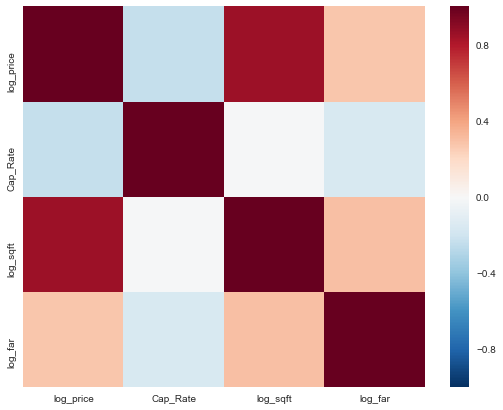

In [41]:
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

#### Non-linear Correlation (Spearman)

Assumptions
- nonlinearly related
- non-normally distributed
- Ordinal variables
    - binning variables from categorical variables into numerics are a good why to transform the variables. Might be good for large categorical variables like: yr built, zip, lat, long, units, tenants

In [42]:
# Binning
num = LabelEncoder()
df['bin_city'] = num.fit_transform(df['Property City'].astype('str'))
df['bin_zip'] = num.fit_transform(df['Property Zip Code'].astype('str'))
df['bin_type'] = num.fit_transform(df['PropertyType'].astype('str'))
df['bin_class'] = num.fit_transform(df['Building Class'].astype('str'))
df['bin_condition'] = num.fit_transform(df['Building Condition'].astype('str'))
df['bin_material'] = num.fit_transform(df['BuildingMaterials'].astype('str'))
df['bin_yrbuilt'] = num.fit_transform(df['Year Built'].astype('str'))
df['saleyear'] = df['Sale Date'].dt.year
df['bin_saleyear']= num.fit_transform(df['saleyear'].astype('str'))

# how to bin long and lat???
# df['bin_long'] = num.fit_transform(df['Longitude'].astype('str'))
df.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
sb.pairplot(qual)

In [ ]:
b_type = df['bin_type']
b_city = df['bin_city']
b_class = df['bin_class']
b_cond = df['bin_condition']
b_material = df['bin_material']

spearmanr(b_type,b_city)

In [ ]:
spearmanr(b_type,b_class)

In [ ]:
spearmanr(b_type,b_cond)

In [ ]:
spearmanr(b_type,b_material)

#### p-values > .05  mean the variables are not correlated

In [ ]:
table = pd.crosstab(b_type,b_class)

chi2, p, dof, expected = chi2_contingency(table.values)
(chi2,p)

In [ ]:
table = pd.crosstab(b_type,b_city)

chi2, p, dof, expected = chi2_contingency(table.values)
(chi2,p)

In [ ]:
table = pd.crosstab(b_type,b_cond)

chi2, p, dof, expected = chi2_contingency(table.values)
(chi2,p)

In [ ]:
table = pd.crosstab(b_type,b_material)

chi2, p, dof, expected = chi2_contingency(table.values)
(chi2,p)

# Transform & Scale
To prevent differing magnitude amoung variables from producing errorneous or misleading statistics

### Normalization
putting each observation on a relative scale beween the values of 0 and 1 
- Scikit-Learn Preprocessing
    - Scale data
    - Center data
    - Normalize data
    - Bin data
    - Impute data

In [ ]:
df.head()

In [ ]:
price = df.log_price
plt.plot(price)

In [ ]:
df[['log_price']].describe()

In [ ]:
price_matrix = price.reshape(-1,1)
scaled = preprocessing.MinMaxScaler(feature_range = (0,10))
scaled_price = scaled.fit_transform(price_matrix)
plt.plot(scaled_price)

In [ ]:
standardized_price = scale(price, axis = 0, with_mean=False, with_std=False)
plt.plot(standardized_price)

### Standardization 
Rescaling data so it has a zero mean and unit variance 

In [ ]:
standardized_price = scale(price)
plt.plot(standardized_price)

# Machine Learning
- Techniques
    - Regression
        - Linear
        - Logistic
    - Decision Tree
    - Neural Network
    - Bayeian 
        - Naive Bayes
    - Deep Learning
    - Ensemble
    - Regularization
    - Rule System
    - Dimension Reduction
        - PCA
    - Instance Based
        - k-nearest neighbor
    - Clustering
        - k-means Clustering
        - Hierarchical Clustering
        - Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
        
- Test and Train Sets
    - Use random sampling to generate random samples and then break the data into test and training sets:
        - train set: 2/3 of data set 
        - test set: 1/3  of data set
       
- Supervised vs Unsupervised Learning
    - Supervised
        - Labeled data
        - Learning from the now
    - Unsupervised
        - Unlabeled data
        -Learning from history and unknown

##### Factor Analysis
- Latent Variables
    - Variables are meaningful but inferred and not directly observable
- Assumptions
    - Metric
    - Continuous or ordinal
    - r > 0.3
    - n > 100 & more than 5 observations per feautre (col.)
    - Homogenous    

###### Singluar Variable Decomposition (SVD)
- Decompose a matrix into 3 resultant metrices to reduce info redunancy and noise
- Commonly used in PCA

### PCA

In [ ]:
pca = decomposition.PCA()
df_pca = pca.fit_transform(quant)

pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_ratio_.sum()

How much info is compresed into the first few components

When you are deciding how many components to keep, look at the percent of cumulative variance. Make sure to retain at least 70% of the dataset's original information.
1 = 100%


In [ ]:
names = quant.columns.values
comps = pd.DataFrame(pca.components_,names)
comps

Using the matrix above and heatmap below we look to see which components are worth keeping
* Remember components are the numbers! not the variables!

In [ ]:
sb.heatmap(comps)

In [ ]:
pca = decomposition.PCA()
df_pca = pca.fit_transform(qual)

pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_ratio_.sum()

In [ ]:
name = qual.columns.values
comps = pd.DataFrame(pca.components_,name)
comps

In [ ]:
sb.heatmap(comps)

In [ ]:
qualandquant = df[['log_price','Cap_Rate','log_sqft','log_far','bin_city','bin_type']]
pca = decomposition.PCA()
df_pca = pca.fit_transform(qualandquant)

pca.explained_variance_ratio_

In [ ]:
namers = qualandquant.columns.values
comps = pd.DataFrame(pca.components_,namers)
comps

# Outliers
- Point outliers
    - Distance observations when compared to majority
- Contextual outliers
    - Distance observations when compared to specific context
- Collective outliers
    - A clustering of outliers that may seem reasonable in comparsion to each other

Tukey Method
1. boxplot outliers
2. Using the interquartile ranges to see outliers

In [ ]:
# 1. Boxplot use
x = qualandquant.ix[:,0:5].values
y = qualandquant.ix[:,5].values
quant.boxplot(return_type='dict')
plt.plot()

In [ ]:
pricing = x[:,1]
prop_outliers = (pricing > 17)
qualandquant[prop_outliers]
# remove the rows if the values are outliers!

In [ ]:
# 2. IQR use 
pd.options.display.float_format = '{:.1f}'.format
x_qaq = pd.DataFrame(x)
print (x_qaq.describe())

In [ ]:
# IQR = 75% - 25%
# dif = IQR * 1.5
# outlier limit = 25% - dif OR 75% + dif

#### Multivariate outliers

In [ ]:
sb.boxplot(x=df.PropertyType, y=df.log_price, data=df, palette='hls')

In [ ]:
sb.pairplot(qualandquant,hue='bin_city', palette='hls')

### DBSCAN
- Unsupervised method that clusters core samples and denotes non-core samples 
- use to identify collective outliers
- eps = the max distance between two samples for them to be clustered in the same neighborhood (start at 0.1)
- min_samples = the min number of samples in a neighborhood for a data point to qualify as a core point (start very low)

In [ ]:
model = DBSCAN(eps = 0.8, min_samples=19).fit(qualandquant)
model

In [ ]:
outliers_df = pd.DataFrame(qualandquant)

print(Counter(model.labels_))

print (outliers_df[model.labels_ ==-1])

## K-Mean Cluster Analysis
- Unsupervised data
        - number of cluster centers (K)
        - Nearest mean Values (Euclidian distance between observations)
- used when there is an idea of the subgroups
- Used for market price and cost modeling
- customer segmentation
- insurance claim, fraud detection
- Necesary things to keep in mind
    - Scale variables before
    - look at data to estimate number of clusterings

In [ ]:
x = scale(qualandquant)
y = pd.DataFrame(qualandquant.bin_type)
names = qualandquant.columns.values
names

In [ ]:
clustering = KMeans(n_clusters=5)
clustering.fit(x)

#### Plotting

In [ ]:
y.columns = ['bin_type']

color_theme = np.array(['darkgray','lightsalmon','powderblue','orange','red'])
plt.subplot(1,2,1)
plt.scatter(x=qualandquant.log_sqft, y=qualandquant.log_price, c=color_theme[qualandquant.bin_type], s=10)
plt.title('Price sqft Classification')

plt.subplot(1,2,2)
plt.scatter(x=qualandquant.log_sqft, y=qualandquant.log_price, c=color_theme[clustering.labels_], s=10)
plt.title('K-means Classification')

In [ ]:
relabel = np.choose(clustering.labels_, [0,3,1,4,2]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=qualandquant.log_sqft, y=qualandquant.log_price, c=color_theme[qualandquant.bin_type], s=15)
plt.title('Price sqft Classification')

plt.subplot(1,2,2)
plt.scatter(x=qualandquant.log_sqft, y=qualandquant.log_price, c=color_theme[relabel], s=15)
plt.title('K-means Classification')


Doesn't look like an amazingly great job because of the top right section is all the same cluster

In [ ]:
print(classification_report(y,relabel))
# Precision: model's relevancy
# Recall: model's completeness

### Hierarchical Clustering
- Finds distance between each data point and its nearest neighbors
- Linking the most nearby neighbors
- Dendrogram
- Parameters
    - Distance Metrics:
        - Euclidian
        - Manhattan
        - Consine
    - Linkage Parameters
        - Ward
        - Complete
        - Average
    - Use trail and error

### K-Nearest Neighbors 
- Supervised
- predicts based on how similar training observations are to the new, incoming, observations
- Assumptions
    - Ordinal or nominal y variables
    - numeric or ordinal x variables (because of scaling)
    - little noise
    - labeled
    - only relevant features
    - distinguishable subgroups
    - avoid using large datasets as it will take a long time.

#### Splitting data into test and train sets

In [ ]:
df.columns

In [ ]:
x_prime = df.ix[:,(6,17,18,19,20,21,23,24,25,26)].values
y = df.ix[:,22].values

In [ ]:
x = preprocessing.scale(x_prime)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.33, random_state=17)

In [ ]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train, y_train)
print(clf)

In [ ]:
y_expect = y_test
y_pred = clf.predict(x_test)

print(metrics.classification_report(y_expect, y_pred))

This is showing us that types 1 and 3 are very complete and the relevance is very high for both
0, 2, 4 are not full for completeness, but the relevance of 2 is high
* This is probably because the majority of the dataset is either 1,2,3 types
* May want to get more info for 0 and 4

# Network Analysis

#### Vocab
- Network
    - Body of connected data that's evaluated during graph analysis
- Graph
    - Data visualization schematic depicting data comprised in a network
- Nodes
    - Vertices around which a graph is formed
- Edges
    - Lines that connect veritces within a graph structure
- Directed graph (digraph) 
    - Graph where there is a direction assigned to each edge that connects a node
- Directed edge
    - Edge feature that has been asssigned a direction between nodes
-Undirected graph
    - Graph where all edges are bidirectional
- Undirected Edge 
    - Bidirectional edge feature
- Graph size
    - Number of edges in a graph
- Graph order
    - Number of vertices in a graph
- Degree
    - Number of edges connected to a vertex, with loops counted twice


#### Types of Graph Generators
- graph drawing algorithms
- Network analysis algorithms
- Algorithmic routing for graphs
- Graph search algorithms
- Subgraph algorithms


In [ ]:
G = nx.Graph()
G.add_node(1)
nx.draw(G)

In [ ]:
G.add_nodes_from([2,3,4,5,6,8,9,12,15,16])
nx.draw(G)

In [ ]:
G.add_edges_from([(2,4),(2,6),(2,8),(2,12),(2,16),(3,6),(3,9),(3,12),(3,15),(4,8),(4,12),(4,16),(6,12),(8,16)])
nx.draw(G)

In [ ]:
nx.draw_circular(G, node_color='bisque',with_labels=True)
# nx.draw_spring(G)


In [ ]:
G.remove_node(1)
nx.draw_circular(G, node_color='bisque',with_labels=True)

#### Identify graph properties

In [ ]:
sum_stats = nx.info(G)
print(sum_stats)

In [ ]:
print(nx.degree(G))

#### Graph Generator

In [ ]:
G = nx.complete_graph(25)
nx.draw(G,node_color='bisque', with_labels=True)

In [ ]:
G = nx.gnc_graph(7, seed=25)
nx.draw(G, node_color='bisque',with_labels=True)

In [ ]:
ego_g = nx.ego_graph(G, 3, radius = 5)
nx.draw(G, node_color='bisque',with_labels=True)

#### Directed Network Analysis
- Generate graph objects and edge list
- Assign attributes to graph nodes
- Visualize the network

In [ ]:
dg = nx.gn_graph(7, seed=25)

for line in nx.generate_edgelist(dg, data=False):
    print(line)

In [ ]:
dg.node[0]['Name'] = 'Alice'
print(dg.node[0])

In [ ]:
dg.node[0]['Name'] = 'Bob'
dg.node[1]['Name'] = 'Claire'
dg.node[2]['Name'] = 'Dennis'
dg.node[3]['Name'] = 'Esther'
dg.node[4]['Name'] = 'Frank'
dg.node[5]['Name'] = 'George'

In [ ]:
dg.add_nodes_from([(0,{'age':25}),(1,{'age':31}),(2,{'age':18}),(3,{'age':47}),(4,{'age':22}),(5,{'age':23})])
print(dg.node[0])

In [ ]:
dg.node[0]['Gender'] = 'm'
dg.node[1]['Gender'] = 'f'
dg.node[2]['Gender'] = 'm'
dg.node[3]['Gender'] = 'f'
dg.node[4]['Gender'] = 'm'
dg.node[5]['Gender'] = 'm'

In [ ]:
nx.draw_circular(dg, node_color='bisque', with_label=True)

In [ ]:
labeldict = {0: 'Alice', 1: 'Bob', 2:'Claire', 3:'Dennis', 4:'Esther',5:'Frank',6:'George'}

nx.draw_circular(dg, labels = labeldict, node_color='bisque', with_label=True)

In [ ]:
G = dg.to_directed()
nx.draw_spectral(G, labels=labeldict, node_color='bisque', with_label=True)

# Linear Regression

### Multiple Linear Regression
Use Cases
- Sale Forecasting
- Resource consumption forecasting
- Supply cost forecasting
- Telecom services lifecycle forecasting

Assumptions
- All variabales are continuous numeric, not categorical
- Data is free of missing values and outliers
- Linear relationship between x's and y
- All x's are independent of each other
- Residuals are noramlly distributed

In [ ]:
mfdf = df.loc[df['PropertyType'] == 'Multi-Family']
mfquant = mfdf[['log_price','Cap_Rate','log_sqft','log_far']]
sb.pairplot(mfquant)
plt.suptitle('Multi-Family Scatterplot', size = 20)

In [ ]:
print (mfquant.corr())

In [ ]:
mf_data = mfquant.ix[:,(1,2,3)].values
mf_target = mfquant.ix[:,0].values
mf_data_names = ['Cap','Sqft','FAR']
x, y = scale(mf_data), mf_target
LinReg = LinearRegression(normalize=True)
LinReg.fit(x,y)
print (LinReg.score(x,y))

In [ ]:
RFE(LinReg,3)
estimator = SVR(kernel='linear')
selector = RFE(estimator, 5, step=1)
selector = selector.fit(x,y)
selector.support_
selector.ranking_

In [ ]:
rdf = df.loc[df['PropertyType'] == 'Retail']
rquant = rdf[['log_price','Cap_Rate','log_sqft','log_far']]
sb.pairplot(rquant)
plt.suptitle('Retail Scatterplot', size = 20)

In [ ]:
print(rquant.corr())

In [ ]:
retail_data = rquant.ix[:,(1,2,3)].values
retail_target = rquant.ix[:,0].values
retail_data_names = ['Cap','Sqft','FAR']
x, y = scale(retail_data), retail_target
LinReg = LinearRegression(normalize=True)
LinReg.fit(x,y)
print (LinReg.score(x,y))

In [ ]:
ofdf = df.loc[df['PropertyType'] == 'Office']
ofquant = ofdf[['log_price','Cap_Rate','log_sqft','log_far']]
sb.pairplot(ofquant)
plt.suptitle('Office Scatterplot', size = 20)

In [ ]:
print(ofquant.corr())

In [ ]:
office_data = ofquant.ix[:,(1,2,3)].values
office_target = ofquant.ix[:,0].values
office_data_names = ['Cap','Sqft','FAR']
x, y = scale(office_data), office_target
LinReg = LinearRegression(normalize=True)
LinReg.fit(x,y)
print (LinReg.score(x,y))

In [ ]:
indf = df.loc[df['PropertyType'] == 'Industrial']
inquant = indf[['log_price','Cap_Rate','log_sqft','log_far']]
sb.pairplot(inquant)
plt.suptitle('Industrial Scatterplot', size = 20)

In [ ]:
print(inquant.corr())

In [ ]:
# Missing Values?
miss_val = x==np.NAN
x[miss_val == True]

### Logistic Regression
- Predict the value of a numeric categorical variable based on its relationship with independent variables
Assumptions
- Data has no missing values
- Dependent variable is *binary* or *orindal*
- X variables are independent
- at least 50 observations per X variable

data = df.ix[:,(columns)].values
col_names = ['name1','name2']
y = data.ix[:,column].values

#### Checking independencies
sb.regplot(x='column',y='other x variable', data = df, scatter=True)
